In [1]:
import re #for regular expressions
import nltk #for text manipulation
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
pd.set_option("display.max_colwidth",200)
warnings.filterwarnings("ignore",category=DeprecationWarning)
%matplotlib inline

In [4]:
#import parquet file
train_data =pd.read_parquet('/Users/kashafali/Documents/Duke/IDS703-NLP/Project/NLP_FinalProject/00_source_data/train-00000-of-00001.parquet')
test_data =pd.read_parquet('/Users/kashafali/Documents/Duke/IDS703-NLP/Project/NLP_FinalProject/00_source_data/test-00000-of-00001.parquet')


In [9]:
#train_data.head()
# 1 is Democrat
train_data[train_data['labels']==1].head(10) #Democrat

,date,id,username,text,party,labels
0,2021-10-13 19:47:44,1448374915636383745,SenatorHassan,"Happy th birthday to the @USNavy! The strength, dedication, and skill of our Sailors including those at Portsmouth Naval Shipyard help keep this country safe, secure, and free. Today we recognize ...",Democrat,1
1,2021-06-30 14:53:13,1410250073003462656,SenatorMenendez,The greatest generation's investment in infrastructure made us the envy of the world. But now we've gone almost an entire lifetime without making any significant investments in the NEXT generation...,Democrat,1
3,2021-04-14 14:02:49,1382333523567185921,SenBlumenthal,"/ To get lasting change we cant just lock up those convicted of these crimes, but must also work to combat bias and bigotry. The NO HATE Act would allow courts to implement alternative sentencing...",Democrat,1
5,2021-05-11 17:18:50,1392167324401143812,SenJeffMerkley,The #ForthePeopleAct includes reforms that are popular with Americans no matter what party theyre from: Expanded early voting Automatic voter registration Public disclosure of campaign contributio...,Democrat,1
6,2021-08-10 16:22:55,1425130548620578816,SenBlumenthal,"Todays strong, bipartisan vote is just the beginningI'm going to continue fighting for more investments necessary to meet our nations challenges.",Democrat,1
9,2021-01-20 13:55:04,1351890994220957698,CoryBooker,Today we start anew.,Democrat,1
12,2021-02-04 18:25:00,1357394743576170499,SenJeffMerkley,The LGBTQ community around the world will once again know that America stands with them and will protect their rights. https://t.co/E0hIUOaYjr,Democrat,1
18,2021-05-05 19:22:03,1390024006472982528,SenGillibrand,"Unemployment benefits are not the problem. A lack of affordable, high-quality child care, paid leave, and an unlivable minimum wage are the problem. If we want to help families get back to work, l...",Democrat,1
19,2021-11-30 22:07:26,1465804692466937857,SenatorShaheen,"This is jarring and tragic. We are nearly years into the pandemic and recording alarming rates of cases, hospitalizations and deaths. We couldn't prevent most deaths years ago, but we can now. ...",Democrat,1
21,2021-07-28 17:07:29,1420430723786448899,SenStabenow,I've been working in Congress to make sure our workers are leading this effort. I know I can count on @POTUS and @SecGranholm as partners in this!,Democrat,1


In [10]:
# 0 is Republican
train_data[train_data['labels']==0].head(10) #Republican

,date,id,username,text,party,labels
2,2021-08-08 01:11:29,1424176405881966599,SenBillCassidy,"Thanks to @SenTedCruz and @SenatorWarnock, the Infrastructure Investment and Jobs Act authorizes the Interstate East-West corridor across TX, LA, MS, AL, and GA. Working together to deliver real ...",Republican,0
4,2021-12-11 16:06:38,1469700160934621188,SenatorBraun,Today were celebrating years of the Hoosier state. Happy birthday Indiana! https://t.co/gjzh3dHnIb,Republican,0
7,2021-08-12 01:13:26,1425626448518385664,SenatorHagerty,"Supporting crime victims requires holding crime perpetrators accountable.Yet the Biden Admin is preventing ICE from deporting thousands of criminal illegal aliens. This morning, the Senate adopted...",Republican,0
8,2021-12-11 16:27:51,1469705498224209928,SenBillCassidy,"We in Louisiana know how natural disasters change lives. If theres anyway Louisiana can help, we will. I will support Federal relief. Our hearts are with Kentucky.",Republican,0
10,2021-12-23 14:48:01,1474029029804097536,RandPaul,"Ill be back with more grievances, more waste, more holiday cheer in a little while. In the meantime, I hope you all are airing your grievances as well. Let it out! #Festivus",Republican,0
11,2021-02-13 22:13:54,1360713836400177157,SenatorLankford,"Four of the states in had impeachment clauses in their state constitution that specifically allowed impeaching a former official, but when they wrote the United States Constitution, they only allo...",Republican,0
13,2021-02-18 23:10:06,1362539921744031747,SenJohnThune,Had the opportunity to speak to @usds Advanced Leadership and Practice class this afternoon. Another great stop on campus. https://t.co/fd5y8fwoAc,Republican,0
14,2021-11-08 19:02:59,1457785741967200257,HawleyMO,Because its right https://t.co/4PXNIHVSWM,Republican,0
15,2021-07-16 21:31:56,1416148618852110344,SenRickScott,"Joe Biden's inflation crisis is raging and all he can think about is more harmful, reckless and wasteful government spending. Americas poorest families are hurting and I'm fighting every day to...",Republican,0
16,2021-04-10 21:15:00,1380992735855919104,senrobportman,"Last month, on my trip to the southern border, I heard directly from Border Patrol agents about how the current surge of unlawful migrants is straining resources, endangering not just the vulnerab...",Republican,0


In [11]:
train_data.shape # to check the number of rows and columns

(79754, 6)

In [12]:
train_data['labels'].value_counts() # to check the number of rows and columns

1    40990
0    38764
Name: labels, dtype: int64

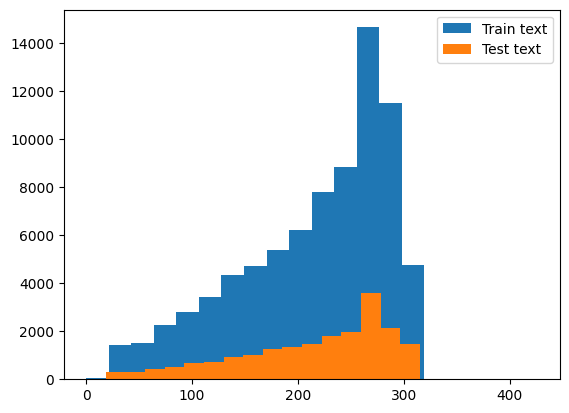

In [14]:
# see length of train and test data by this histogram

length_train_dataset = train_data['text'].str.len()
length_test_dataset = test_data['text'].str.len()
plt.hist(length_train_dataset, bins=20,label="Train text")
plt.hist(length_test_dataset, bins=20,label="Test text")
plt.legend() 
plt.show()

In [15]:
#only keep the text and labels
train = train_data[['text','labels']]
test = test_data[['text','labels']]

In [16]:
combine=train.append(test,ignore_index=True) #train and test dataset are combined
combine.shape

/var/folders/2s/c87gg64118ndg_yrky9zvlnc0000gn/T/ipykernel_1573/1782420178.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combine=train.append(test,ignore_index=True) #train and test dataset are combined


(99693, 2)

In [17]:

def remove_pattern(input_text,pattern):
    r= re.findall(pattern, input_text)
    for i in r:
        input_text = re.sub(i, '', input_text)
    return input_text
                        

In [19]:
# removing twitter handles
combine['tidy_tweet'] = np.vectorize(remove_pattern)(combine['text'],"@[\w]*") 
combine.head()


,text,labels,tidy_tweet
0,"Happy th birthday to the @USNavy! The strength, dedication, and skill of our Sailors including those at Portsmouth Naval Shipyard help keep this country safe, secure, and free. Today we recognize ...",1,"Happy th birthday to the ! The strength, dedication, and skill of our Sailors including those at Portsmouth Naval Shipyard help keep this country safe, secure, and free. Today we recognize and cel..."
1,The greatest generation's investment in infrastructure made us the envy of the world. But now we've gone almost an entire lifetime without making any significant investments in the NEXT generation...,1,The greatest generation's investment in infrastructure made us the envy of the world. But now we've gone almost an entire lifetime without making any significant investments in the NEXT generation...
2,"Thanks to @SenTedCruz and @SenatorWarnock, the Infrastructure Investment and Jobs Act authorizes the Interstate East-West corridor across TX, LA, MS, AL, and GA. Working together to deliver real ...",0,"Thanks to and , the Infrastructure Investment and Jobs Act authorizes the Interstate East-West corridor across TX, LA, MS, AL, and GA. Working together to deliver real infrastructure!"
3,"/ To get lasting change we cant just lock up those convicted of these crimes, but must also work to combat bias and bigotry. The NO HATE Act would allow courts to implement alternative sentencing...",1,"/ To get lasting change we cant just lock up those convicted of these crimes, but must also work to combat bias and bigotry. The NO HATE Act would allow courts to implement alternative sentencing..."
4,Today were celebrating years of the Hoosier state. Happy birthday Indiana! https://t.co/gjzh3dHnIb,0,Today were celebrating years of the Hoosier state. Happy birthday Indiana! https://t.co/gjzh3dHnIb


In [20]:
# all emojis and characters are replaced by white space
combine['tidy_tweet'] = combine['tidy_tweet'].str.replace("[^a-zA-Z#]"," ")
combine.head(10)

/var/folders/2s/c87gg64118ndg_yrky9zvlnc0000gn/T/ipykernel_1573/563215241.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  combine['tidy_tweet'] = combine['tidy_tweet'].str.replace("[^a-zA-Z#]"," ")


,text,labels,tidy_tweet
0,"Happy th birthday to the @USNavy! The strength, dedication, and skill of our Sailors including those at Portsmouth Naval Shipyard help keep this country safe, secure, and free. Today we recognize ...",1,Happy th birthday to the The strength dedication and skill of our Sailors including those at Portsmouth Naval Shipyard help keep this country safe secure and free Today we recognize and cel...
1,The greatest generation's investment in infrastructure made us the envy of the world. But now we've gone almost an entire lifetime without making any significant investments in the NEXT generation...,1,The greatest generation s investment in infrastructure made us the envy of the world But now we ve gone almost an entire lifetime without making any significant investments in the NEXT generation...
2,"Thanks to @SenTedCruz and @SenatorWarnock, the Infrastructure Investment and Jobs Act authorizes the Interstate East-West corridor across TX, LA, MS, AL, and GA. Working together to deliver real ...",0,Thanks to and the Infrastructure Investment and Jobs Act authorizes the Interstate East West corridor across TX LA MS AL and GA Working together to deliver real infrastructure
3,"/ To get lasting change we cant just lock up those convicted of these crimes, but must also work to combat bias and bigotry. The NO HATE Act would allow courts to implement alternative sentencing...",1,To get lasting change we cant just lock up those convicted of these crimes but must also work to combat bias and bigotry The NO HATE Act would allow courts to implement alternative sentencing...
4,Today were celebrating years of the Hoosier state. Happy birthday Indiana! https://t.co/gjzh3dHnIb,0,Today were celebrating years of the Hoosier state Happy birthday Indiana https t co gjzh dHnIb
5,The #ForthePeopleAct includes reforms that are popular with Americans no matter what party theyre from: Expanded early voting Automatic voter registration Public disclosure of campaign contributio...,1,The #ForthePeopleAct includes reforms that are popular with Americans no matter what party theyre from Expanded early voting Automatic voter registration Public disclosure of campaign contributio...
6,"Todays strong, bipartisan vote is just the beginningI'm going to continue fighting for more investments necessary to meet our nations challenges.",1,Todays strong bipartisan vote is just the beginningI m going to continue fighting for more investments necessary to meet our nations challenges
7,"Supporting crime victims requires holding crime perpetrators accountable.Yet the Biden Admin is preventing ICE from deporting thousands of criminal illegal aliens. This morning, the Senate adopted...",0,Supporting crime victims requires holding crime perpetrators accountable Yet the Biden Admin is preventing ICE from deporting thousands of criminal illegal aliens This morning the Senate adopted...
8,"We in Louisiana know how natural disasters change lives. If theres anyway Louisiana can help, we will. I will support Federal relief. Our hearts are with Kentucky.",0,We in Louisiana know how natural disasters change lives If theres anyway Louisiana can help we will I will support Federal relief Our hearts are with Kentucky
9,Today we start anew.,1,Today we start anew


In [21]:
# removing short words
combine['tidy_tweet'] = combine['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3])) #removing words whose length is less than 3

In [22]:
combine.head()

,text,labels,tidy_tweet
0,"Happy th birthday to the @USNavy! The strength, dedication, and skill of our Sailors including those at Portsmouth Naval Shipyard help keep this country safe, secure, and free. Today we recognize ...",1,Happy birthday strength dedication skill Sailors including those Portsmouth Naval Shipyard help keep this country safe secure free Today recognize celebrate their incredible service NavyBirthday h...
1,The greatest generation's investment in infrastructure made us the envy of the world. But now we've gone almost an entire lifetime without making any significant investments in the NEXT generation...,1,greatest generation investment infrastructure made envy world gone almost entire lifetime without making significant investments NEXT generation American infrastructure time that change https brikl
2,"Thanks to @SenTedCruz and @SenatorWarnock, the Infrastructure Investment and Jobs Act authorizes the Interstate East-West corridor across TX, LA, MS, AL, and GA. Working together to deliver real ...",0,Thanks Infrastructure Investment Jobs authorizes Interstate East West corridor across Working together deliver real infrastructure
3,"/ To get lasting change we cant just lock up those convicted of these crimes, but must also work to combat bias and bigotry. The NO HATE Act would allow courts to implement alternative sentencing...",1,lasting change cant just lock those convicted these crimes must also work combat bias bigotry HATE would allow courts implement alternative sentencingrequiring people educational training communit...
4,Today were celebrating years of the Hoosier state. Happy birthday Indiana! https://t.co/gjzh3dHnIb,0,Today were celebrating years Hoosier state Happy birthday Indiana https gjzh dHnIb


In [23]:
tokenized_tweet = combine['tidy_tweet'].apply(lambda x:x.split()) #it will split all words by whitespace
tokenized_tweet.head()

0    [Happy, birthday, strength, dedication, skill, Sailors, including, those, Portsmouth, Naval, Shipyard, help, keep, this, country, safe, secure, free, Today, recognize, celebrate, their, incredible...
1    [greatest, generation, investment, infrastructure, made, envy, world, gone, almost, entire, lifetime, without, making, significant, investments, NEXT, generation, American, infrastructure, time, t...
2                                                         [Thanks, Infrastructure, Investment, Jobs, authorizes, Interstate, East, West, corridor, across, Working, together, deliver, real, infrastructure]
3    [lasting, change, cant, just, lock, those, convicted, these, crimes, must, also, work, combat, bias, bigotry, HATE, would, allow, courts, implement, alternative, sentencingrequiring, people, educa...
4                                                                                                            [Today, were, celebrating, years, Hoosier, state, Happy, birthday, Indi

In [24]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) #it will stemmatized all words in tweet


In [25]:
tokenized_tweet.head()

0    [happi, birthday, strength, dedic, skill, sailor, includ, those, portsmouth, naval, shipyard, help, keep, thi, countri, safe, secur, free, today, recogn, celebr, their, incred, servic, navybirthda...
1           [greatest, gener, invest, infrastructur, made, envi, world, gone, almost, entir, lifetim, without, make, signific, invest, next, gener, american, infrastructur, time, that, chang, http, brikl]
2                                                                               [thank, infrastructur, invest, job, author, interst, east, west, corridor, across, work, togeth, deliv, real, infrastructur]
3    [last, chang, cant, just, lock, those, convict, these, crime, must, also, work, combat, bia, bigotri, hate, would, allow, court, implement, altern, sentencingrequir, peopl, educ, train, commun, se...
4                                                                                                                   [today, were, celebr, year, hoosier, state, happi, birthday, ind

In [26]:

#now let's combine these tokens back

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i]) #concat all words into one sentence
combine['tidy_tweet'] = tokenized_tweet

In [28]:
combine.head()

,text,labels,tidy_tweet
0,"Happy th birthday to the @USNavy! The strength, dedication, and skill of our Sailors including those at Portsmouth Naval Shipyard help keep this country safe, secure, and free. Today we recognize ...",1,happi birthday strength dedic skill sailor includ those portsmouth naval shipyard help keep thi countri safe secur free today recogn celebr their incred servic navybirthday http guhedmapk
1,The greatest generation's investment in infrastructure made us the envy of the world. But now we've gone almost an entire lifetime without making any significant investments in the NEXT generation...,1,greatest gener invest infrastructur made envi world gone almost entir lifetim without make signific invest next gener american infrastructur time that chang http brikl
2,"Thanks to @SenTedCruz and @SenatorWarnock, the Infrastructure Investment and Jobs Act authorizes the Interstate East-West corridor across TX, LA, MS, AL, and GA. Working together to deliver real ...",0,thank infrastructur invest job author interst east west corridor across work togeth deliv real infrastructur
3,"/ To get lasting change we cant just lock up those convicted of these crimes, but must also work to combat bias and bigotry. The NO HATE Act would allow courts to implement alternative sentencing...",1,last chang cant just lock those convict these crime must also work combat bia bigotri hate would allow court implement altern sentencingrequir peopl educ train commun servic counter their hate
4,Today were celebrating years of the Hoosier state. Happy birthday Indiana! https://t.co/gjzh3dHnIb,0,today were celebr year hoosier state happi birthday indiana http gjzh dhnib


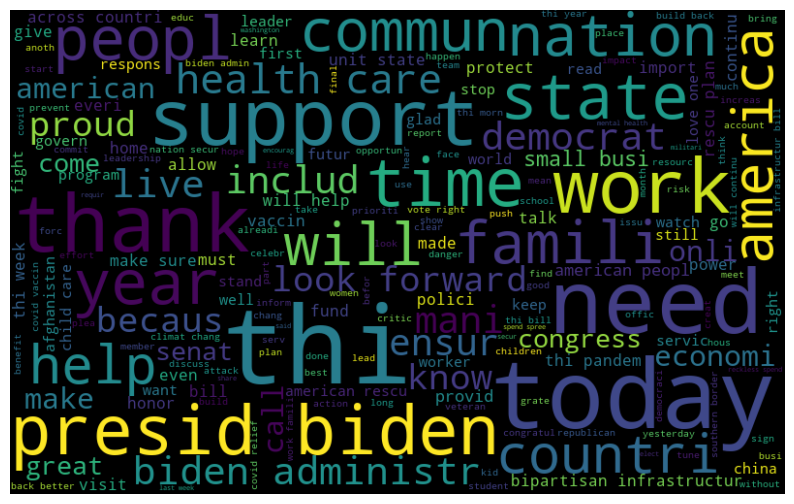

In [30]:

all_words = ' '.join([text for text in combine['tidy_tweet']]) 
from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#you can see that most words are positive or neutral in above wordcloud.
#now we will plot separate wordclouds for both demo and repub in our data.


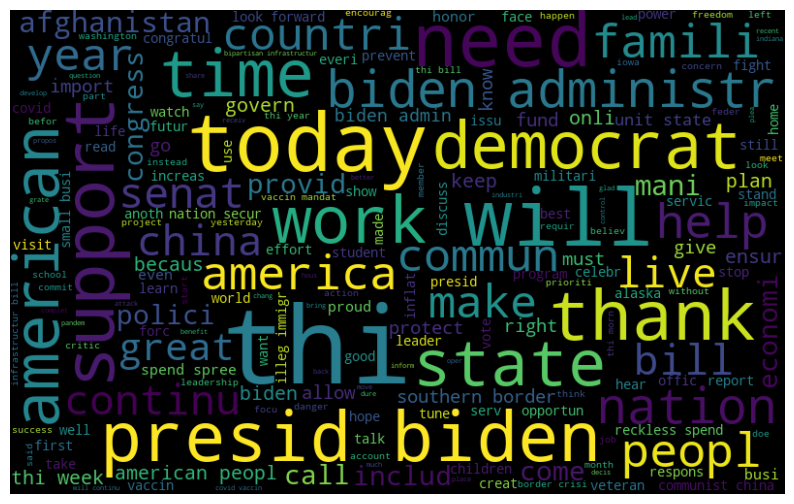

In [32]:
# 0 is Republican
normal_words= ' '.join([text for text in combine['tidy_tweet'][combine['labels']==0]])
wordcloud= WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(normal_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()


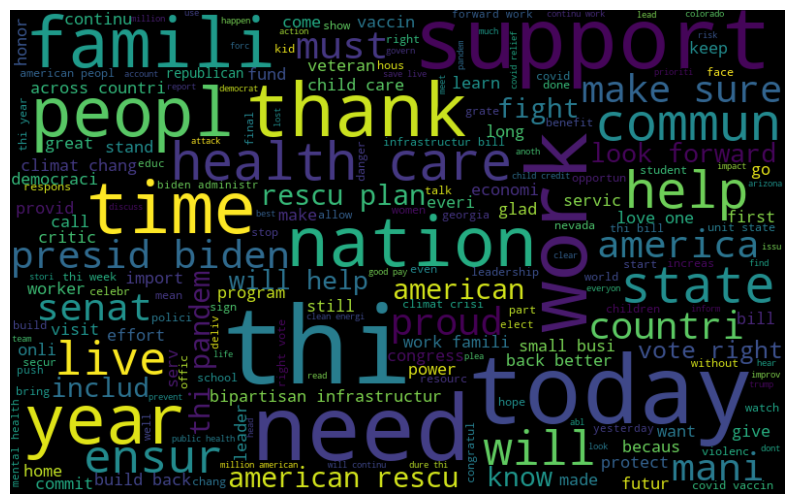

In [34]:
# 1 is Democrat
negative_words= ' '.join([text for text in combine['tidy_tweet'][combine['labels']==1]])
wordcloud= WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(negative_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()
